In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import pandas_datareader.data as web
from matplotlib import pyplot
import seaborn as sns

#Plotting 
from pandas.plotting import scatter_matrix

#Libraries for Statistical Models
import statsmodels.api as sm

#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

_TARGET_STK = 'MSFT'
pd.options.display.max_columns = None
pd.options.display.expand_frame_repr = False

In [3]:
from datetime import datetime
import yfinance as yfin

# Loading the data
stk_tickers = [_TARGET_STK, 'IBM', 'GOOGL']
ccy_tickers = ['DEXJPUS', 'DEXUSUK']
idx_tickers = ['VIXCLS', 'SP500', 'DJIA']

start = datetime(2014, 1, 1)
end = datetime(2023, 12, 31)
# stk_data = web.get_data_yahoo(stk_tickers, start, end)
stk_data = yfin.download(stk_tickers, start, end).dropna()
ccy_data = web.DataReader(ccy_tickers, 'fred', start, end).dropna()
idx_data = web.DataReader(idx_tickers, 'fred', start, end).dropna()
print(stk_data)

[*********************100%%**********************]  3 of 3 completed
             Adj Close                               Close                                High                                 Low                                Open                             Volume                   
                 GOOGL         IBM        MSFT       GOOGL         IBM        MSFT       GOOGL         IBM        MSFT       GOOGL         IBM        MSFT       GOOGL         IBM        MSFT      GOOGL      IBM      MSFT
Date                                                                                                                                                                                                                        
2014-01-02   27.855856  116.571342   31.290808   27.855856  177.370941   37.160000   27.971722  179.158707   37.400002   27.734234  177.055450   37.099998   27.914413  178.977051   37.349998   72783144  4755639  30632200
2014-01-03   27.652653  117.268814   31.080303 

In [4]:
print(stk_data)
print(ccy_data)
print(idx_data)

             Adj Close                               Close                                High                                 Low                                Open                             Volume                   
                 GOOGL         IBM        MSFT       GOOGL         IBM        MSFT       GOOGL         IBM        MSFT       GOOGL         IBM        MSFT       GOOGL         IBM        MSFT      GOOGL      IBM      MSFT
Date                                                                                                                                                                                                                        
2014-01-02   27.855856  116.571373   31.290812   27.855856  177.370941   37.160000   27.971722  179.158707   37.400002   27.734234  177.055450   37.099998   27.914413  178.977051   37.349998   72783144  4755639  30632200
2014-01-03   27.652653  117.268791   31.080303   27.652653  178.432129   36.910000   27.951200  179.110901   37.2200

In [5]:
import torch
time_str = datetime.now().strftime('%Y-%m-%d_%H.%M.%S')
return_period = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
validation_size = 0.2
seq_len = 5
num_layers = 10
hidden_size = 128
epoch_num=300
batch_size = 32
model_name=f"{_TARGET_STK}_V2_{time_str}.pt"

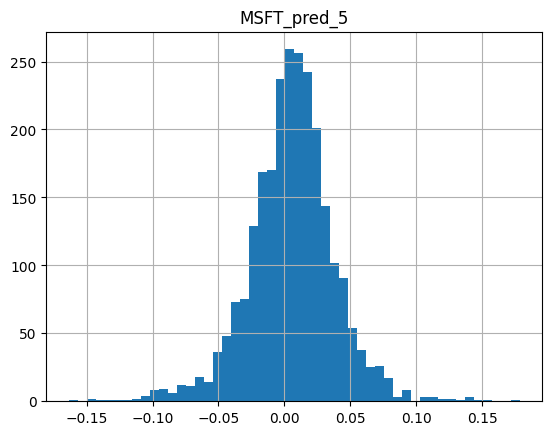

            MSFT_pred_5
Date                   
2014-01-02    -0.043864
2014-01-03    -0.023571
2014-01-06    -0.031830
2014-01-07    -0.017303
2014-01-08     0.027964


In [6]:

Y_raw = stk_data.loc[:, ('Adj Close', _TARGET_STK)].to_frame().pct_change(return_period).shift(-return_period).dropna().astype('float32')
Y_raw.columns = [f"{_TARGET_STK}_pred_{return_period}"]
Y_raw.hist(bins=50)
pyplot.show()
print(Y_raw.head())

In [7]:
import pandas_ta as ta
help(ta.percent_return)

Help on function percent_return in module pandas_ta.performance.percent_return:

percent_return(close, length=None, cumulative=None, offset=None, **kwargs)
    Percent Return
    
    Calculates the percent return of a Series.
    See also: help(df.ta.percent_return) for additional **kwargs a valid 'df'.
    
    Sources:
        https://stackoverflow.com/questions/31287552/logarithmic-returns-in-pandas-dataframe
    
    Calculation:
        Default Inputs:
            length=1, cumulative=False
        PCTRET = close.pct_change(length)
        CUMPCTRET = PCTRET.cumsum() if cumulative
    
    Args:
        close (pd.Series): Series of 'close's
        length (int): It's period. Default: 20
        cumulative (bool): If True, returns the cumulative returns. Default: False
        offset (int): How many periods to offset the result. Default: 0
    
    Kwargs:
        fillna (value, optional): pd.DataFrame.fillna(value)
        fill_method (value, optional): Type of fill method
    
 

In [7]:
def gen_analysis_data(stock_name):
    data = stk_data.xs(stock_name, axis=1, level=1)
    
    data = pd.concat([data.ta.percent_return(length=return_period, prefix=stock_name),
                      data.ta.adosc(prefix=stock_name),
                      data.ta.kvo(prefix=stock_name)], 
                      axis=1)
    data = data.dropna().astype('float32')
    return data

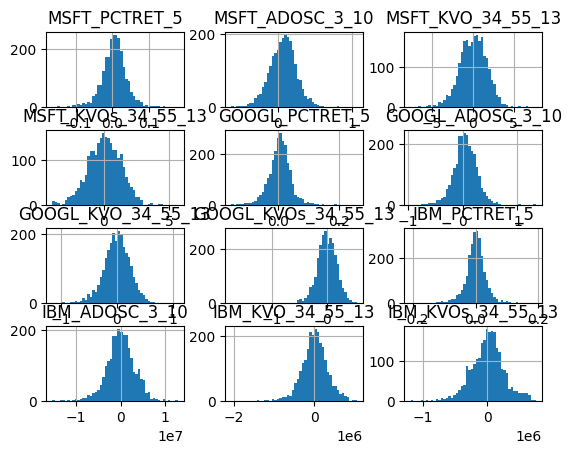

In [8]:
import pandas_ta as ta
Target_Data = gen_analysis_data(_TARGET_STK)
GOOGL_Data = gen_analysis_data('GOOGL')
IBM_Data = gen_analysis_data('IBM')
X1 = pd.concat([Target_Data, GOOGL_Data, IBM_Data], axis=1)
X1.hist(bins=50)
pyplot.show()

            VIXCLS  SP500_PCTRET_5  DJIA_PCTRET_5
DATE                                             
2014-01-28   15.80       -0.027823      -0.029601
2014-01-29   17.35       -0.038301      -0.038755
2014-01-30   17.29       -0.018743      -0.021531
2014-01-31   18.41       -0.004301      -0.011352
2014-02-03   21.44       -0.022267      -0.029365
2014-02-04   19.11       -0.020809      -0.030343
2014-02-05   19.95       -0.012716      -0.018970
2014-02-06   17.23       -0.011571      -0.013886
2014-02-07   15.29        0.008095       0.006066
2014-02-10   15.26        0.033268       0.027906
2014-02-11   14.51        0.036776       0.035579
2014-02-12   14.30        0.038604       0.033919
2014-02-13   14.14        0.031803       0.025534
2014-02-14   13.57        0.023155       0.022813
2014-02-18   13.87        0.022735       0.020796
2014-02-19   15.50        0.004946       0.002863
2014-02-20   14.79        0.011279       0.010605
2014-02-21   14.68        0.003509       0.004724


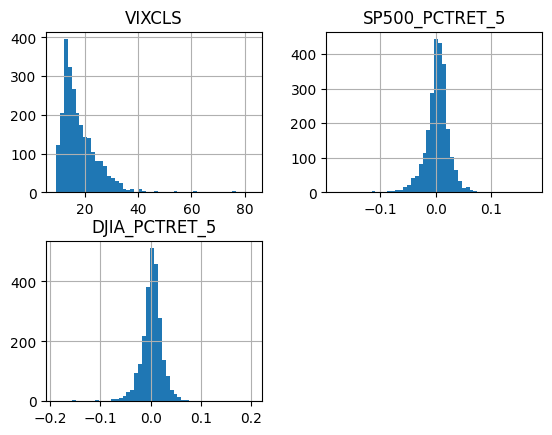

In [9]:
X2 = ccy_data.pct_change(return_period).dropna()
X2 = X2.rename(columns={ column : f"{column}_PCTRET_{return_period}" for column in X2.columns.to_list()})

X3 = pd.concat([idx_data['SP500'].pct_change(return_period), idx_data['DJIA'].pct_change(return_period)], axis=1)
X3 = X3.rename(columns={ column : f"{column}_PCTRET_{return_period}" for column in X3.columns.to_list()})
X3 = pd.concat([idx_data['VIXCLS'], X3], axis=1).dropna()
print(X3.head(50))
X3.hist(bins=50)
pyplot.show()


            MSFT_PCTRET_5  MSFT_ADOSC_3_10  MSFT_KVO_34_55_13  MSFT_KVOs_34_55_13  GOOGL_PCTRET_5  GOOGL_ADOSC_3_10  GOOGL_KVO_34_55_13  GOOGL_KVOs_34_55_13  IBM_PCTRET_5  IBM_ADOSC_3_10  IBM_KVO_34_55_13  IBM_KVOs_34_55_13  DEXJPUS_PCTRET_5  DEXUSUK_PCTRET_5    VIXCLS  SP500_PCTRET_5  DJIA_PCTRET_5
2014-04-08      -1.308555        -1.690573           1.232238            4.405005       -0.601842         -4.153285           -4.824546            -8.466474     -0.199888       -0.513286          0.833094           2.351165         -1.130745          0.490430 -0.449152       -0.868923      -0.811737
2014-04-09      -0.789177        -1.075079           1.532799            4.064411       -0.156753         -2.507277           -3.952049            -7.909431      0.489770        0.017996          1.096770           2.212197         -1.563637          0.547725 -0.593703       -0.524691      -0.440016
2014-04-10      -1.356621        -1.292523           0.864158            3.645830       -1.270323

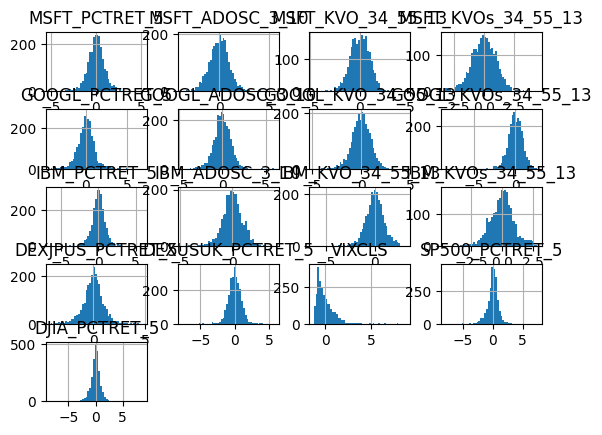

In [10]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn_pandas import DataFrameMapper

X = pd.concat([X1, X2, X3], axis=1).dropna()
target_dfm = DataFrameMapper(
    [ ([column], StandardScaler()) for column in X.columns.to_list()]
    , input_df=True, df_out=True)
X = target_dfm.fit_transform(X)

features = X.columns.to_list()

print(X)
# pyplot.figure(figsize=(20,10))
X.hist(bins=50)
pyplot.show()

In [11]:
pd.set_option('display.precision', 3)
dataset = pd.concat([Y_raw, X], axis=1).dropna()
print(dataset.head(10))

X = dataset.loc[:, X.columns]
Y = dataset.loc[:, Y_raw.columns]


            MSFT_pred_5  MSFT_PCTRET_5  MSFT_ADOSC_3_10  MSFT_KVO_34_55_13  MSFT_KVOs_34_55_13  GOOGL_PCTRET_5  GOOGL_ADOSC_3_10  GOOGL_KVO_34_55_13  GOOGL_KVOs_34_55_13  IBM_PCTRET_5  IBM_ADOSC_3_10  IBM_KVO_34_55_13  IBM_KVOs_34_55_13  DEXJPUS_PCTRET_5  DEXUSUK_PCTRET_5  VIXCLS  SP500_PCTRET_5  DJIA_PCTRET_5
2014-04-08       -0.002         -1.309           -1.691              1.232               4.405          -0.602            -4.153              -4.825               -8.466        -0.200          -0.513             0.833              2.351            -1.131             0.490  -0.449          -0.869         -0.812
2014-04-09       -0.002         -0.789           -1.075              1.533               4.064          -0.157            -2.507              -3.952               -7.909         0.490           0.018             1.097              2.212            -1.564             0.548  -0.594          -0.525         -0.440
2014-04-10        0.017         -1.357           -1.293         

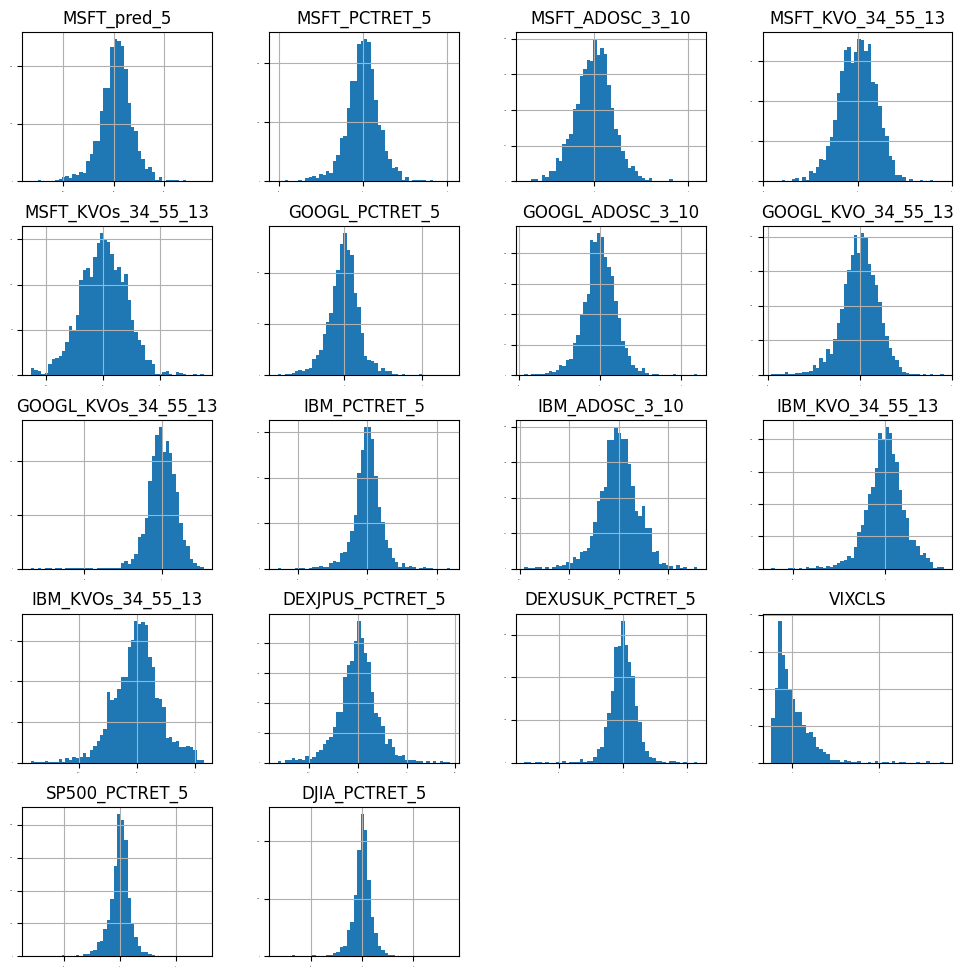

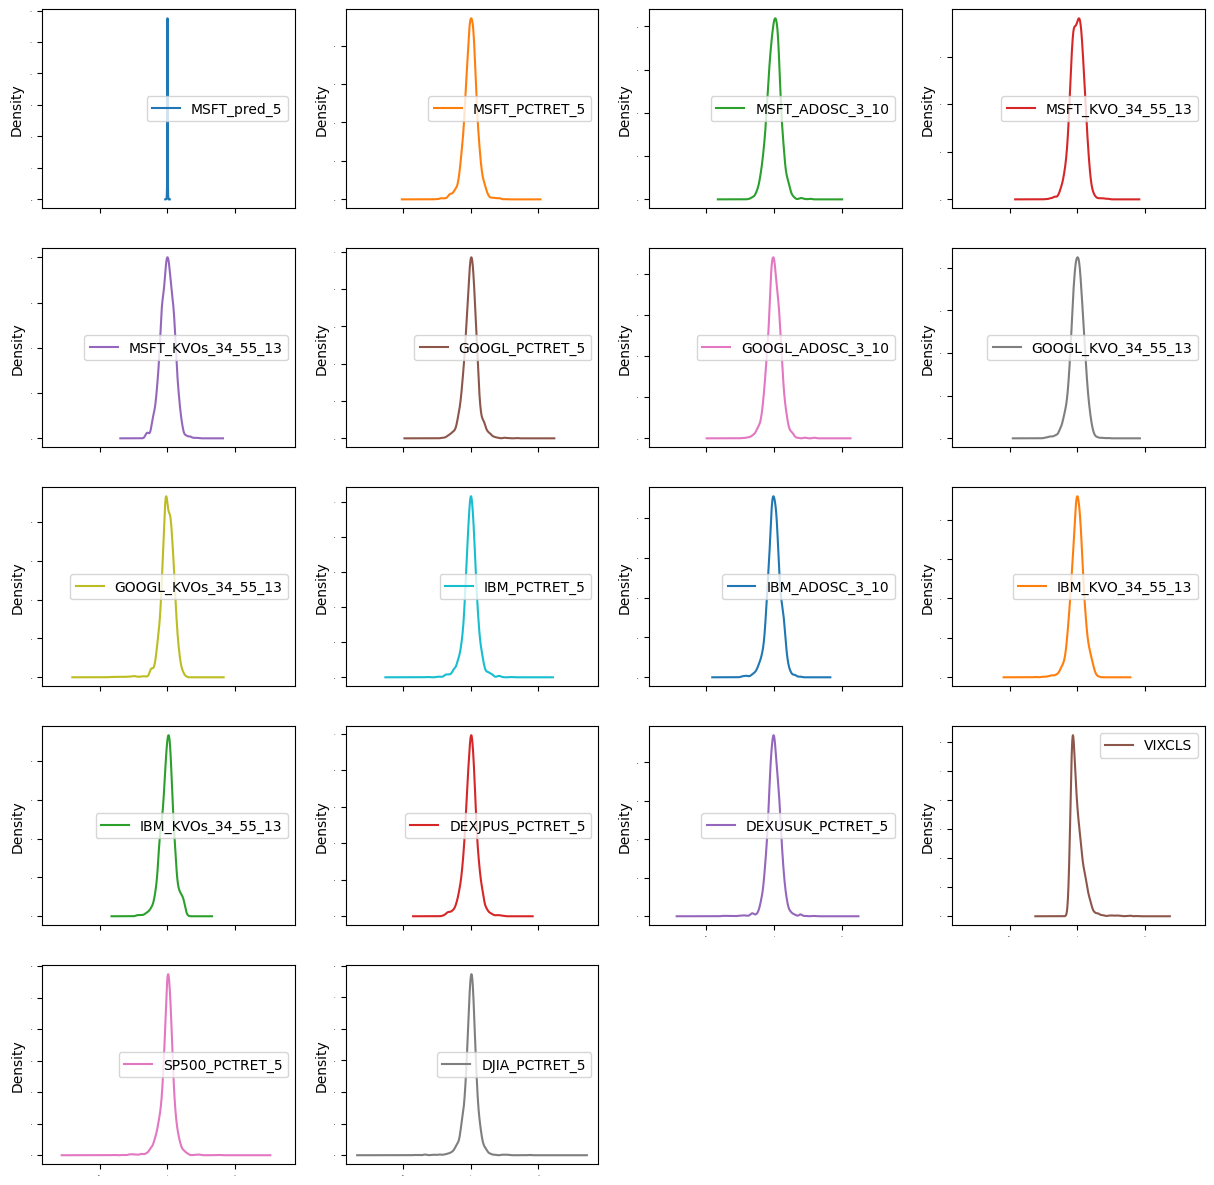

In [12]:
pd.set_option('display.precision', 3)
pd.set_option('display.max_rows', None)
dataset.describe()
dataset.hist(bins=50, sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
pyplot.show()
dataset.plot(kind='density', subplots=True, sharex=True, legend=True, fontsize=1, layout=(5, 4), figsize=(15,15))
pyplot.show()

<Axes: title={'center': 'Correlation Matrix'}>

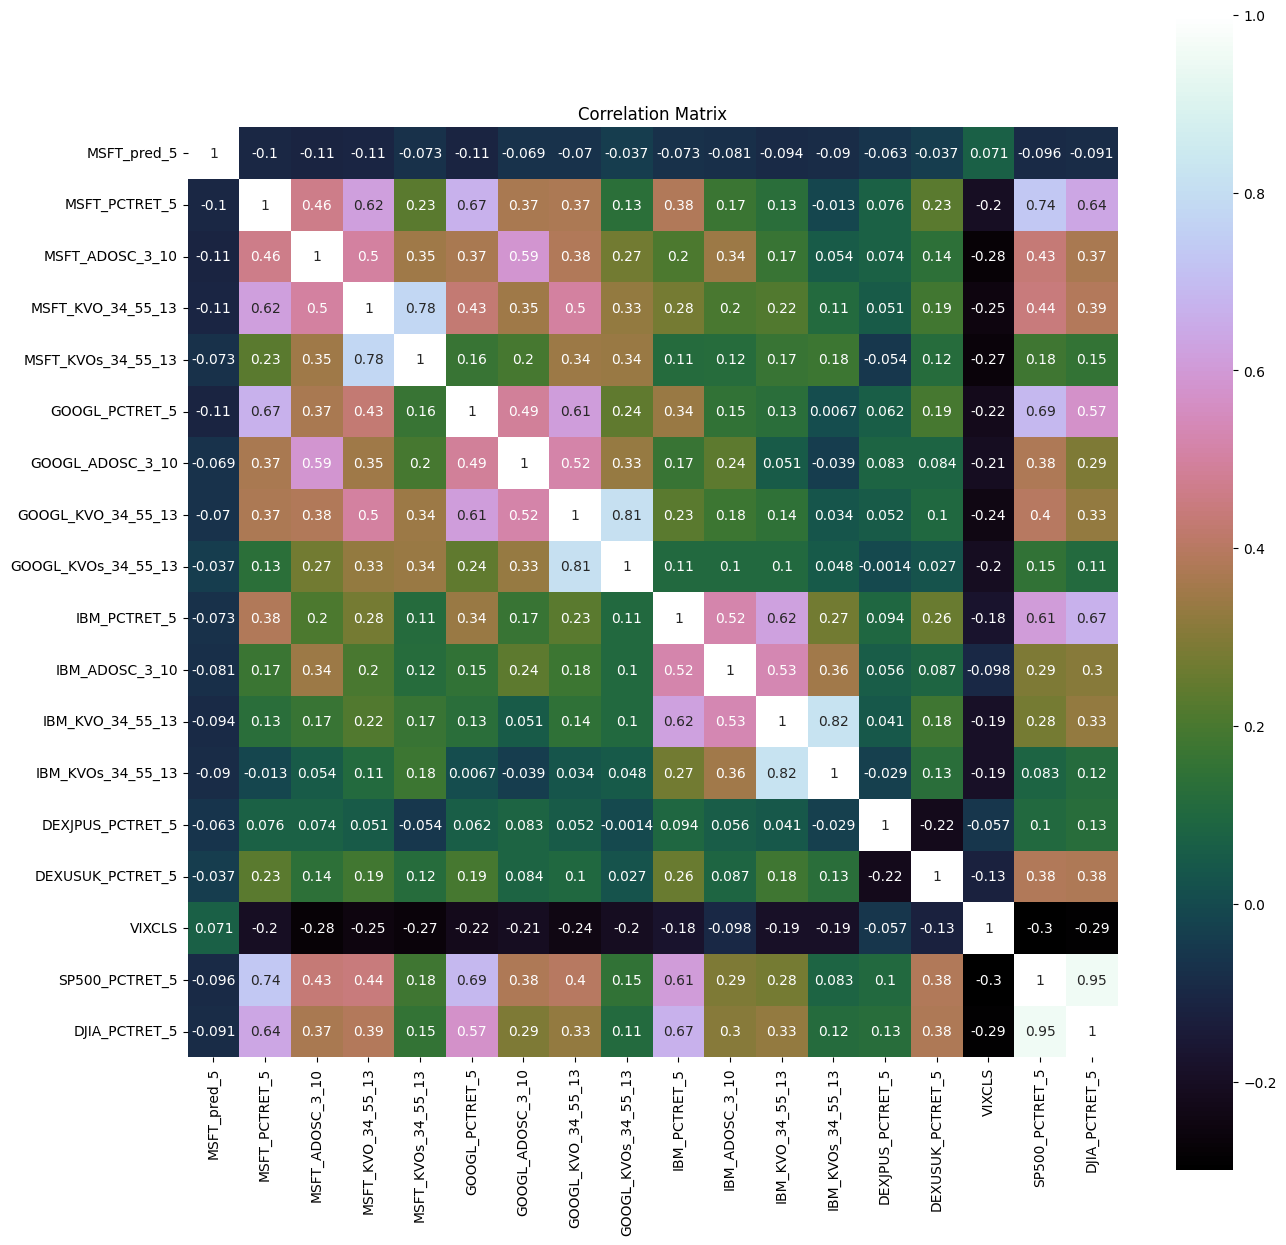

In [13]:
correlation = dataset.corr()
pyplot.figure(figsize=(15, 15))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')

<Figure size 1500x1500 with 0 Axes>

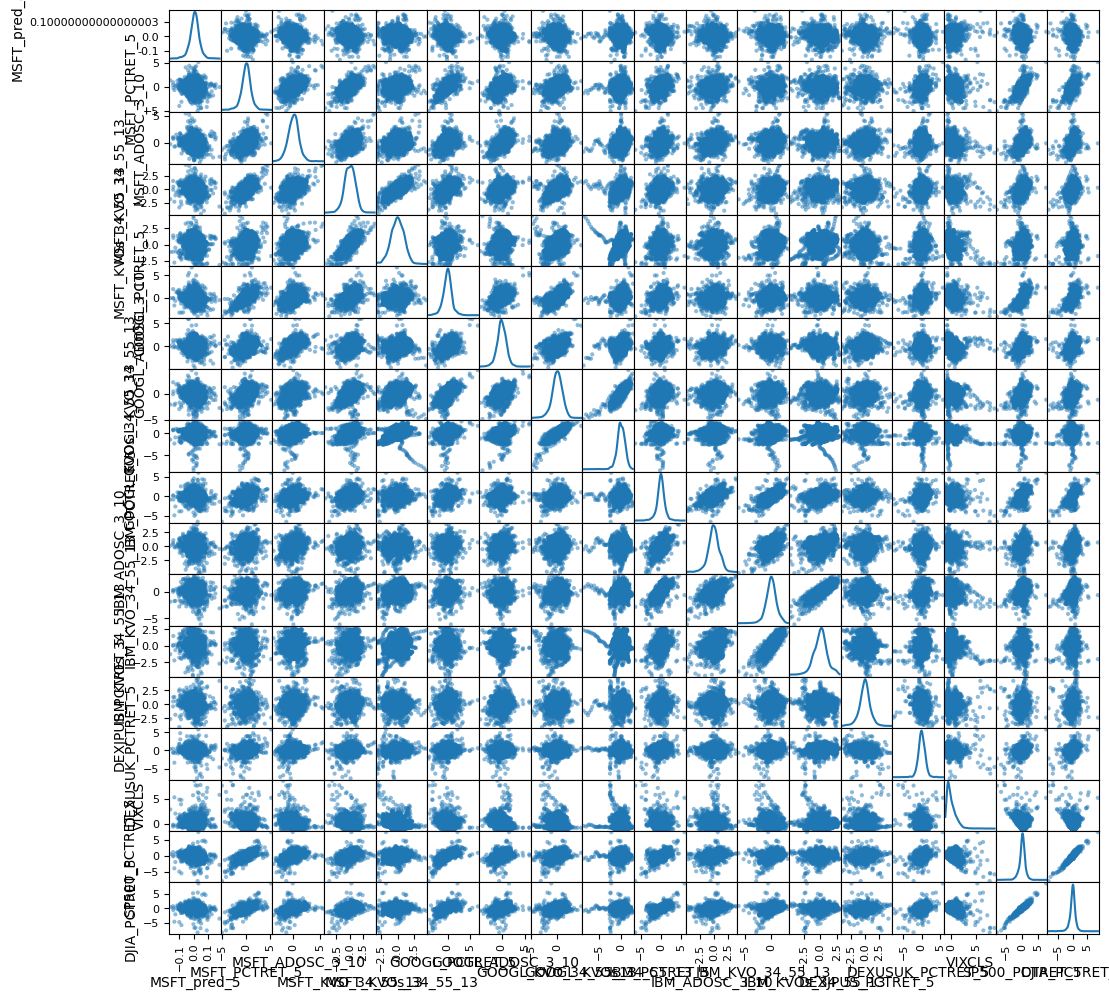

In [15]:
pyplot.figure(figsize=(15,15))
scatter_matrix(dataset,figsize=(12,12), diagonal='kde')
pyplot.show()

In [14]:
from torch.utils.data import Dataset, DataLoader

class LSTMDataSet(Dataset):
    def __init__(self, X, Y, seq_len):
        self.X = X
        self.Y = Y
        self.seq_len = seq_len
    
    def __len__(self):
        return len(self.X) - seq_len + 1
    
    def __getitem__(self, idx):
        return (torch.tensor(np.array(self.X[idx: idx + seq_len].loc[:, features]), dtype=torch.float32),
                torch.tensor(np.array(self.Y.iloc[idx + seq_len - 1,:]), dtype=torch.float32))


train_size = int(len(X) * (1 - validation_size))
X_train = X.iloc[0:train_size].loc[:,features]
Y_train = Y.iloc[0:train_size]
X_test  = X.iloc[train_size - seq_len + 1:len(X)].loc[:, features]
Y_test  = Y.iloc[train_size - seq_len + 1:len(Y)]

print(f"x:{X.shape}\nY:{Y.shape}\nX_train:{X_train.shape}\nY_train:{Y_train.shape}\nX_test:{X_test.shape}\nY_test:{Y_test.shape}")

train_loader = DataLoader(LSTMDataSet(X_train, Y_train, seq_len), batch_size=batch_size)
test_loader = DataLoader(LSTMDataSet(X_test, Y_test, seq_len), batch_size=batch_size)

x:(2416, 17)
Y:(2416, 1)
X_train:(1932, 17)
Y_train:(1932, 1)
X_test:(488, 17)
Y_test:(488, 1)


In [17]:
print(dataset.head(6))
# print(X.head(6))
stk_data.loc[:, ('Adj Close', _TARGET_STK)].to_frame().pct_change(return_period).head(75)

            MSFT_pred_5  MSFT_PCTRET_5  MSFT_ADOSC_3_10  MSFT_KVO_34_55_13  MSFT_KVOs_34_55_13  GOOGL_PCTRET_5  GOOGL_ADOSC_3_10  GOOGL_KVO_34_55_13  GOOGL_KVOs_34_55_13  IBM_PCTRET_5  IBM_ADOSC_3_10  IBM_KVO_34_55_13  IBM_KVOs_34_55_13  DEXJPUS_PCTRET_5  DEXUSUK_PCTRET_5  VIXCLS  SP500_PCTRET_5  DJIA_PCTRET_5
2014-04-08       -0.002         -1.309           -1.691              1.232               4.405          -0.602            -4.153              -4.825               -8.466        -0.200          -0.513             0.833              2.351            -1.131             0.490  -0.449          -0.869         -0.812
2014-04-09       -0.002         -0.789           -1.075              1.533               4.064          -0.157            -2.507              -3.952               -7.909         0.490           0.018             1.097              2.212            -1.564             0.548  -0.594          -0.525         -0.440
2014-04-10        0.017         -1.357           -1.293         

,Adj Close
,MSFT
Date,
2014-01-02,NaN
2014-01-03,NaN
2014-01-06,NaN
2014-01-07,NaN
2014-01-08,NaN
2014-01-09,-0.044
2014-01-10,-0.024
2014-01-13,-0.032


In [16]:
from torch import nn
class StockPricePredictionLSTM(nn.Module):
    def __init__(self, seq_len, input_size = len(features), hidden_size = hidden_size, num_layers=num_layers):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        """
            input_size    : The number of expected features in the input x
            hidden_size   : The number of features in the hidden state h
            num_layers    : Number of recurrent layers. E.g., setting num_layers=2 would mean stacking two LSTMs together to form a stacked LSTM, with the second LSTM taking in outputs of the first LSTM and computing the final results. Default: 1
            bias          : If False, then the layer does not use bias weights b_ih and b_hh. Default: True
            batch_first   : If True, then the input and output tensors are provided as (batch, seq, feature) instead of (seq, batch, feature). Note that this does not apply to hidden or cell states. See the Inputs/Outputs sections below for details. Default: False
            dropout       : If non-zero, introduces a Dropout layer on the outputs of each LSTM layer except the last layer, with dropout probability equal to dropout. Default: 0
            bidirectional : If True, becomes a bidirectional LSTM. Default: False
            proj_size     : If > 0, will use LSTM with projections of corresponding size. Default: 0
        """
        self.rnn = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Sequential(
            nn.Linear(hidden_size, int(hidden_size / 2)),
            nn.ReLU(),
            nn.Linear(int(hidden_size / 2), int(hidden_size / 4)),
            nn.ReLU(),
            nn.Linear(int(hidden_size / 4), 8),
            nn.ReLU(),
            nn.Linear(8, 1)            
        )

        self.fc.apply(self.init_weights)
        # self.fc1 = nn.Linear(hidden_size, int(hidden_size / 2))
        # self.fc2 = nn.Linear(int(hidden_size / 2), int(hidden_size / 4))
        # self.fc3 = nn.Linear(int(hidden_size / 4), 8)
        # self.fc4 = nn.Linear(8, 1)
        # self.init_weights()

    def init_weights(self, m):
        if isinstance(m, nn.Linear):
            initrange = 0.5
            nn.init.uniform_(m.weight, -initrange, initrange)
            nn.init.zeros_(m.bias)
    # def init_weights(self):
    #     initrange = 0.5
        # self.fc1.weight.data.uniform_(-initrange, initrange)
        # self.fc1.bias.data.zero_()
        # self.fc2.weight.data.uniform_(-initrange, initrange)
        # self.fc2.bias.data.zero_()
        # self.fc3.weight.data.uniform_(-initrange, initrange)
        # self.fc3.bias.data.zero_()
        # self.fc4.weight.data.uniform_(-initrange, initrange)
        # self.fc4.bias.data.zero_()

    def forward(self, x):
        h_0 = torch.zeros(self.num_layers, x.shape[0], self.hidden_size).to(device)
        c_0 = torch.zeros(self.num_layers, x.shape[0], self.hidden_size).to(device)
        out, (h_out, _) = self.rnn(x, (h_0, c_0))

        fc_input = h_out[-1].view(-1, self.hidden_size)
        return self.fc(fc_input)
        # fc_input1 = out[:, -1, :].view(-1, self.hidden_size)
        # out = self.fc1(fc_input)
        # out = self.fc2(out)
        # out = self.fc3(out)
        # out = self.fc4(out)
        # return out
        # return self.fc4(self.fc3(self.fc2(self.fc1(fc_input))))
        # print(fc_input)
        # print(fc_input1)

        # return self.fc(fc_input)


In [17]:
import math 
from sklearn.metrics import mean_squared_error

def eval_dl_method(model, dl, criterion=None, device=device):
    y_gt = []
    y_pred = []
    vloss = 0.0
    for i, (x, y) in enumerate(dl):
        x = x.to(device)
        y = y.to(device)
        outputs = model(x)
        if criterion != None:
            vloss += criterion(outputs, y).item()
        # print(f"{i}:{vloss}")
        y_gt.extend(y.cpu().detach().numpy().reshape(-1))
        y_pred.extend(outputs.cpu().detach().numpy().reshape(-1))
    
    return (math.sqrt(mean_squared_error(y_gt, y_pred)), y_gt, y_pred, vloss / len(dl))

In [18]:
from tqdm import tqdm
from torch.utils.tensorboard import SummaryWriter

def train_dl_method(model, dl, test_loader):
    model.train()
    learning_rate = 0.01
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    writer = SummaryWriter(f'runs/{_TARGET_STK}/{time_str}')
    
    best_loss = 999999999    
    print(len(dl))
    print(len(test_loader))
    
    for epoch in tqdm(range(epoch_num)):
        # for i, (x, y) in enumerate(tqdm(dl, leave=False)):
        running_loss = 0.0
        for i, (x, y) in enumerate(dl):
            x = x.to(device)
            y = y.to(device)
            optimizer.zero_grad()
            outputs = model(x)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            
            if loss.item() < best_loss:
                best_loss = loss.item()
                torch.save(model.state_dict(), model_name)

        with torch.no_grad():
            (testScore, test_y_gt, test_y_pred, running_vloss)  = eval_dl_method(model, test_loader, criterion)

        writer.add_scalars('Training vs. Validation Loss',
                            { 'Training' : running_loss / len(dl), 'Validation' : running_vloss },
                            epoch + 1)
        writer.flush()
        
        if epoch == 0 or (epoch + 1) % 10 == 0:
            print(f"Epoch: {epoch + 1}, loss = {loss.item(): .5f}")

    writer.add_hparams(
        {'return_period':return_period,
         'validation_size':validation_size,
         'seq_len':seq_len,
         'num_layers': num_layers,
         'hidden_size':hidden_size,
         'epoch_num':epoch_num,
         'batch_size':batch_size},
        {'Training':running_loss/len(dl),
         'Validation':running_vloss}
    )
    writer.close()

2024-01-18 06:49:33.404049: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-18 06:49:33.421564: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-18 06:49:33.516126: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-18 06:49:33.993298: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [19]:
model = StockPricePredictionLSTM(seq_len, num_layers=num_layers, hidden_size=hidden_size)
model = model.to(device)
model.train()
train_dl_method(model, train_loader, test_loader)


61
16


  0%|          | 1/300 [00:01<05:36,  1.13s/it]

Epoch: 1, loss =  0.00227


  3%|▎         | 10/300 [00:10<04:46,  1.01it/s]

Epoch: 10, loss =  0.00224


  7%|▋         | 20/300 [00:19<04:26,  1.05it/s]

Epoch: 20, loss =  0.00218


 10%|█         | 30/300 [00:29<04:01,  1.12it/s]

Epoch: 30, loss =  0.00212


 13%|█▎        | 40/300 [00:38<03:58,  1.09it/s]

Epoch: 40, loss =  0.00210


 17%|█▋        | 50/300 [00:48<03:55,  1.06it/s]

Epoch: 50, loss =  0.00208


 20%|██        | 60/300 [00:58<04:03,  1.01s/it]

Epoch: 60, loss =  0.00207


 23%|██▎       | 70/300 [01:07<03:27,  1.11it/s]

Epoch: 70, loss =  0.00207


 27%|██▋       | 80/300 [01:17<03:26,  1.06it/s]

Epoch: 80, loss =  0.00206


 30%|███       | 90/300 [01:26<03:23,  1.03it/s]

Epoch: 90, loss =  0.00206


 33%|███▎      | 100/300 [01:36<03:09,  1.06it/s]

Epoch: 100, loss =  0.00206


 37%|███▋      | 110/300 [01:45<02:52,  1.10it/s]

Epoch: 110, loss =  0.00206


 40%|████      | 120/300 [01:54<03:07,  1.04s/it]

Epoch: 120, loss =  0.00206


 43%|████▎     | 130/300 [02:04<02:37,  1.08it/s]

Epoch: 130, loss =  0.00206


 47%|████▋     | 140/300 [02:13<02:32,  1.05it/s]

Epoch: 140, loss =  0.00206


 50%|█████     | 150/300 [02:23<02:18,  1.09it/s]

Epoch: 150, loss =  0.00206


 53%|█████▎    | 160/300 [02:33<02:21,  1.01s/it]

Epoch: 160, loss =  0.00206


 57%|█████▋    | 170/300 [02:43<02:05,  1.04it/s]

Epoch: 170, loss =  0.00206


 60%|██████    | 180/300 [02:52<01:48,  1.10it/s]

Epoch: 180, loss =  0.00206


 63%|██████▎   | 190/300 [03:01<01:37,  1.12it/s]

Epoch: 190, loss =  0.00206


 67%|██████▋   | 200/300 [03:11<01:33,  1.07it/s]

Epoch: 200, loss =  0.00206


 70%|███████   | 210/300 [03:21<01:26,  1.04it/s]

Epoch: 210, loss =  0.00206


 73%|███████▎  | 220/300 [03:30<01:14,  1.08it/s]

Epoch: 220, loss =  0.00206


 77%|███████▋  | 230/300 [03:40<01:12,  1.04s/it]

Epoch: 230, loss =  0.00206


 80%|████████  | 240/300 [03:50<01:05,  1.09s/it]

Epoch: 240, loss =  0.00206


 83%|████████▎ | 250/300 [04:00<00:47,  1.06it/s]

Epoch: 250, loss =  0.00206


 87%|████████▋ | 260/300 [04:09<00:37,  1.07it/s]

Epoch: 260, loss =  0.00206


 90%|█████████ | 270/300 [04:19<00:29,  1.02it/s]

Epoch: 270, loss =  0.00206


 93%|█████████▎| 280/300 [04:28<00:18,  1.07it/s]

Epoch: 280, loss =  0.00206


 97%|█████████▋| 290/300 [04:38<00:09,  1.01it/s]

Epoch: 290, loss =  0.00206


100%|██████████| 300/300 [04:48<00:00,  1.04it/s]

Epoch: 300, loss =  0.00206


In [20]:
from torch.utils.tensorboard import SummaryWriter
import io

def generate_predict_graph(y_pred):
    pred_pct_name = f'{_TARGET_STK}_pred_{return_period}'
    target_raw = stk_data.xs(_TARGET_STK, axis=1, level=1).iloc[train_size:]
    y_pred_df = Y_test.iloc[seq_len - 1:]
    y_pred_df[pred_pct_name] = y_pred
    cross_data = pd.concat([target_raw, y_pred_df], axis=1)
    cross_data['pred_price'] = (cross_data[pred_pct_name] + 1) * cross_data['Close']
    print(cross_data)
    cross_data['pred_price'] = cross_data.loc[:,['pred_price']].shift(return_period)
    cross_data[pred_pct_name] = cross_data.loc[:,[pred_pct_name]].shift(return_period)
    cross_data = cross_data.dropna()
    print(cross_data)
   
    pred_price_plot = np.empty_like(cross_data['pred_price'])
    target_price_plot = np.empty_like(cross_data['Close'])
    pred_price_plot[:] = cross_data['pred_price']
    target_price_plot[:] = cross_data['Close']
    figure = pyplot.figure()
    pyplot.plot(target_price_plot, label='Target Price')
    pyplot.plot(pred_price_plot, label='Predict Price')

    writer = SummaryWriter(f'runs/{_TARGET_STK}/{time_str}')
    writer.add_figure('Price', figure)
    
    writer.flush()
    writer.close()

    pyplot.plot(target_price_plot, label='Target Price')
    pyplot.plot(pred_price_plot, label='Predict Price')
    pyplot.legend()
    pyplot.show()


Train RMSE: 0.03
Test RMSE: 0.04
            Adj Close      Close       High        Low       Open    Volume  MSFT_pred_5  pred_price
2021-09-03  295.18228  301.14001  302.60001  300.26001  300.98999  14747900          NaN         NaN
2021-09-07  294.24127  300.17999  301.09000  298.20001  301.01001  17180400          NaN         NaN
2021-09-08  294.27069  300.20999  300.60999  297.47000  299.78000  15046800          NaN         NaN
2021-09-09  291.36923  297.25000  302.14001  297.00000  300.82001  19927000          NaN         NaN
2021-09-10  289.85971  295.70999  299.92001  295.38000  298.42001  19633400          NaN         NaN
2021-09-13  291.11441  296.98999  298.54001  294.07999  297.54999  23652900          NaN         NaN
2021-09-14  293.85901  299.79001  301.39001  298.10001  299.56000  21853400          NaN         NaN
2021-09-15  298.78946  304.82001  305.32001  301.82001  303.26001  28356300          NaN         NaN
2021-09-16  299.18155  305.22000  305.31000  300.76001  30

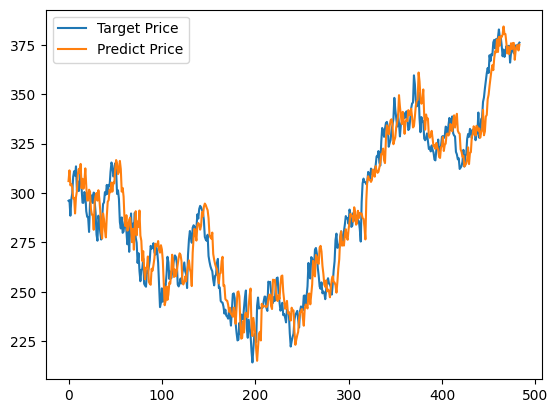

In [21]:
import math 
from sklearn.metrics import mean_squared_error

pd.set_option('display.precision', 5)

model = StockPricePredictionLSTM(seq_len, num_layers=num_layers, hidden_size=hidden_size)
model.load_state_dict(torch.load(model_name))
model.to(device)
model.eval()
(trainScore, train_y_gt, train_y_pred, _)= eval_dl_method(model, train_loader, device=device)
(testScore, test_y_gt, test_y_pred, _)  = eval_dl_method(model, test_loader, device=device)
# print(test_y_gt)
print(f"Train RMSE: {trainScore:.2f}\nTest RMSE: {testScore:.2f}")

writer = SummaryWriter(f'runs/{_TARGET_STK}/{time_str}')
writer.add_scalars('Training vs. Test RMSE', { 'Training' : trainScore, 'Test' : testScore }, 1)
writer.close()

generate_predict_graph(test_y_pred)